In [1]:
%reload_ext autoreload
%autoreload 2

import os
os.chdir("/home/vscode/kipack/")

In [2]:
import numpy as np
# from examples.linear_transport.rbm_2d import run, maxwellian_vec_init
from examples.linear_transport.rbm_2d_ap import run, maxwellian_vec_init

# Parameters
kn = lambda x, y: 1e-8
sigma_s = lambda x, y: 1.0
sigma_a = lambda x, y: 0.0
Q = lambda x, y: 1.0

xmin = [0.0, 0.0]
xmax = [1.0, 1.0]
nx = 20

dx = (xmax[0] - xmin[0]) / nx
dt = 0.001
nt = 100

BC = "periodic"
f_l = lambda vx, vy: 0.0
f_r = lambda vx, vy: 0.0
f_b = lambda vx, vy: 0.0
f_t = lambda vx, vy: 0.0

scheme = "Euler"

# init_func = lambda vmesh, rho, u, T: 0.0
init_func = maxwellian_vec_init

In [3]:
output_ref = run(kn=kn, sigma_s=sigma_s, sigma_a=sigma_a, Q=Q,
                 xmin=xmin, xmax=xmax, nx=nx, dt=dt, nt=nt,
                 BC=BC, f_l=f_l, f_b=f_b, f_r=f_r, f_t=f_t, 
                 coll="linear", scheme=scheme,
                 init_func=init_func)

2 dimensional collision model.
Number of velocity cells: 30.
Velocity domain: disk with raidus 1.0.
dt is 0.001
100/100 [==============================] - 34s 340ms/step


In [4]:
output_rbm = run(kn=kn, sigma_s=sigma_s, sigma_a=sigma_a, Q=Q,
                 xmin=xmin, xmax=xmax, nx=nx, dt=dt, nt=nt,
                 BC=BC, f_l=f_l, f_b=f_b, f_r=f_r, f_t=f_t,
                 coll="rbm", scheme=scheme,
                 init_func=init_func)

2 dimensional collision model.
Number of velocity cells: 30.
Velocity domain: disk with raidus 1.0.
dt is 0.001
100/100 [==============================] - 35s 346ms/step


In [5]:
import matplotlib.pyplot as plt

t_idx = -1

# fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,5))

macro_ref = output_ref["macro_frames"]
macro_rbm = output_rbm["macro_frames"]
# macro_rbm_symm = output_rbm_symm["macro_frames"]

x = output_ref["x"]
t = output_ref["t"]

# ax1.plot(x, macro_ref[t_idx], label="Ref")
# ax1.plot(x, macro_rbm[t_idx], "o", markevery=1, label="RBM")
# ax1.set_xlabel(r"$x$", fontsize=14)
# ax1.set_ylabel(r"$\rho$", fontsize=14)
# ax1.legend()

# ax2.plot(x, macro_ref[t_idx], label="Ref")
# ax2.plot(x, macro_rbm_symm[t_idx], "o", markevery=1, label="RBM-Symm")
# ax2.set_xlabel(r"$x$", fontsize=14)
# ax2.set_ylabel(r"$\rho$", fontsize=14)
# ax2.legend()


rho_errs_rbm = [np.sqrt(np.sum((macro_rbm[t_idx] - macro_ref[t_idx]) ** 2) * dx ** 2) for t_idx in range(nt + 1)]
# rho_errs_rbm_symm = [np.sqrt(np.sum((macro_rbm_symm[t_idx] - macro_ref[t_idx]) ** 2) * dx) for t_idx in range(nt+1)]
# ax3.plot(t, rho_errs_rbm, label="RBM")
# ax3.plot(t, rho_errs_rbm_symm, label="RBM-Symm")
# ax3.set_xlabel(r"$t$", fontsize=14)
# ax3.set_ylabel(r"$\ell^2$ error of $\rho$", fontsize=14)
# ax3.legend()

# plt.savefig("./explicit_fine_example4.pdf")

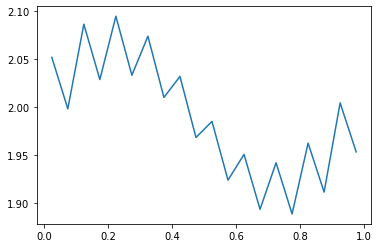

In [6]:
fig, ax = plt.subplots()

ax.plot(x, macro_ref[t_idx][10])

<ipython-input-7-d63f2fd6de43>:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


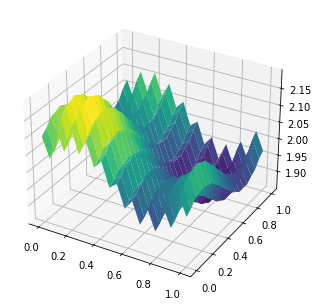

In [7]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
fig = plt.figure()
ax = Axes3D(fig)
X = np.linspace(0, 1, 20)
X, Y = np.meshgrid(X, X)
ax.plot_surface(X, Y, macro_ref[t_idx], rstride=1, cstride=1, cmap=cm.viridis)

<ipython-input-8-15f5fc8d2af7>:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


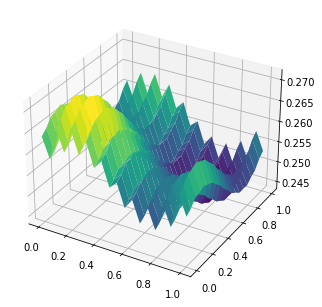

In [8]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
fig = plt.figure()
ax = Axes3D(fig)
X = np.linspace(0, 1, 20)
X, Y = np.meshgrid(X, X)
ax.plot_surface(X, Y, macro_rbm[t_idx], rstride=1, cstride=1, cmap=cm.viridis)

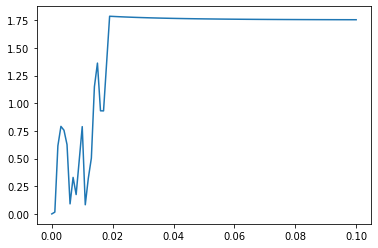

In [9]:
plt.plot(t, rho_errs_rbm)